In [1]:
import datajoint as dj

Insert data and drop databases (Only use if you know what you are doing)

In [28]:
data

array([(412330, 'tw34', 154522, datetime.date(2018, 3, 18), Decimal('21.000')),
       (412753, 'dl36', 154570, datetime.date(2018, 3, 30), Decimal('21.000')),
       (413950, 'dl40', 155585, datetime.date(2018, 4, 18), Decimal('21.000')),
       (418279, 'dl41', 155593, datetime.date(2018, 2, 5), Decimal('21.000')),
       (428047, 'dl51', 158986, datetime.date(2018, 7, 16), Decimal('21.000')),
       (428048, 'dl52', 158987, datetime.date(2018, 7, 16), Decimal('21.000')),
       (432570, 'dl57', 161126, datetime.date(2018, 9, 10), Decimal('21.000')),
       (432572, 'dl56', 161125, datetime.date(2018, 9, 10), Decimal('21.000')),
       (432998, 'dl55', 160920, datetime.date(2018, 9, 5), Decimal('21.000')),
       (435884, 'dl59', 154522, datetime.date(2018, 9, 30), Decimal('21.000')),
       (439457, 'dl61', 163374, datetime.date(2018, 11, 12), Decimal('23.000')),
       (440010, 'dl62', 163782, datetime.date(2018, 11, 24), Decimal('23.000'))],
      dtype=[('subject_id', '<i8'), ('w

Ingest data

In [1]:
from pipeline.ingest import behavior as ingest_behavior

Connecting daveliu@mesoscale-activity.datajoint.io:3306


In [ ]:
ingest_behavior.BehaviorIngest().populate(display_progress=True)

dl10_Manual_20180110_122933.mat skipped - no animal for dl10
dl10_Manual_20180111_101717.mat skipped - no animal for dl10
dl10_Manual_20180112_071121.mat skipped - no animal for dl10
dl10_Manual_20180116_122618.mat skipped - no animal for dl10
dl10_Manual_20180117_121943.mat skipped - no animal for dl10
dl10_Manual_20180118_121214.mat skipped - no animal for dl10
dl10_Manual_20180119_103112.mat skipped - no animal for dl10
dl10_Manual_20180119_111826.mat skipped - no animal for dl10
dl10_Manual_20180122_122030.mat skipped - no animal for dl10
dl10_Manual_20180123_115151.mat skipped - no animal for dl10
dl10_Manual_20180123_120548.mat skipped - no animal for dl10
dl10_Manual_20180124_090521.mat skipped - no animal for dl10
dl10_Manual_20180125_101240.mat skipped - no animal for dl10
dl10_Manual_20180126_093014.mat skipped - no animal for dl10
dl10_Manual_20180126_094734.mat skipped - no animal for dl10
dl10_Manual_20180205_115216.mat skipped - no animal for dl10
dl10_Manual_20180206_120

In [5]:
import pipeline.tracking as tracking


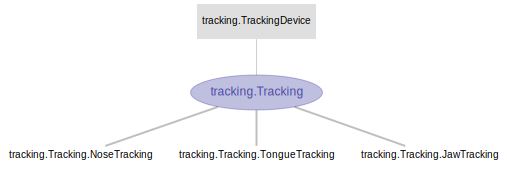

In [6]:
dj.ERD(tracking)

In [8]:
tracking.Tracking.NoseTracking()

subject_id institution 6 digit animal ID,session session number,trial trial number,tracking_device device type/function,nose_x nose x location (px),nose_y nose y location (px),nose_likelihood nose location likelyhood
435884,20,11,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,20,12,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,20,13,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,20,14,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,20,15,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,20,16,Camera 0,=BLOB=,=BLOB=,=BLOB=
435884,20,17,Camera 0,=BLOB=,=BLOB=,=BLOB=


In [4]:
from pipeline.ingest import ephys as ingest_ephys

In [5]:
ingest_ephys.EphysIngest().populate(display_progress=True)

 99%|███████████████████████████████████████▍| 752/763 [00:58<00:00, 12.93it/s]

> c:\users\liul.hhmi\desktop\map-ephys\map-ephys\pipeline\ingest\ephys.py(174)make()
-> clu_ids_diff = np.diff(cluster_ids) # where the units seperate


100%|████████████████████████████████████████| 763/763 [03:22<00:00,  3.77it/s]


Plot some behavior data

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as spio
import numpy as np

In [ ]:
for i in range(len(viT_offset_file) - 1, 0, -1):
    i
    

In [8]:
import ephys
trialNote = ephys.experiment.TrialNote()

In [9]:
animal = 407513
sessionN = 2

In [10]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [11]:
outcome = (behaviorTrial & {'subject_id': animal} & {'session': sessionN}).fetch('outcome', order_by='session')
early_lick = (behaviorTrial  & {'subject_id': animal} & {'session': sessionN}).fetch('early_lick', order_by='session')

In [12]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [13]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [14]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Text(0,0.5,'Proportion Correct')

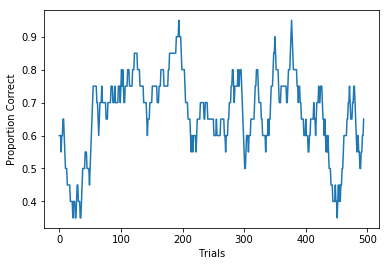

In [15]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

Text(0,0.5,'Early Licks')

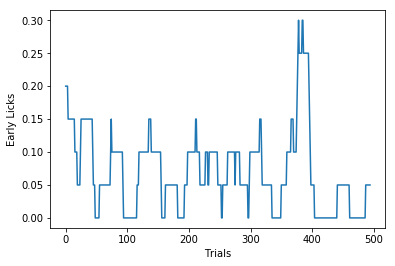

In [16]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')

NameError: name 'np' is not defined